In [1]:
# Load libraries
import pandas as pd;
import numpy as np;
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score as metric
from sklearn.model_selection import validation_curve
from sklearn.metrics import make_scorer


# Random Grid Search

## Load Data

Iris again.

In [2]:
from sklearn.datasets import load_iris;
iris = load_iris();
dat = iris.data;
target = iris.target;

In [3]:
perc_values = [0.85, 0.15];
X_train, X_test, y_train, y_test = train_test_split(dat, target, test_size = perc_values[1], random_state=1);

## Exhaustive Grid Search

We have already covered how to do an exhaustive grid search. Let's do it using cross-validation for SVM models.

In [4]:
from sklearn.svm import SVC as model_constructor

In [5]:
from sklearn.model_selection import GridSearchCV

In [6]:
# SVM
C_values = [1e-03, 1, 1e03];
gamma_values = [1e-03, 1, 1e03];

params_grid = {'C': C_values,
               'gamma': gamma_values} 

In [7]:
# Define grid
grid_cv = GridSearchCV(model_constructor(),
                     param_grid=params_grid,
                     n_jobs=2, ## Paralellization!
                     cv = 5) # Number of folds
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=2,
             param_grid={'C': [0.001, 1, 1000.0], 'gamma': [0.001, 1, 1000.0]})

In [8]:
grid_cv.cv_results_

{'mean_fit_time': array([0.00166106, 0.00150981, 0.00170617, 0.00099568, 0.00103383,
        0.00251617, 0.00103559, 0.00105886, 0.00224352]),
 'std_fit_time': array([5.59873837e-04, 5.14396350e-04, 5.62632960e-04, 1.69572800e-04,
        7.33181750e-05, 5.22481130e-04, 6.13754861e-04, 8.35368349e-05,
        8.75763635e-04]),
 'mean_score_time': array([0.00080457, 0.00089974, 0.00079899, 0.00069804, 0.00046229,
        0.00117836, 0.00091605, 0.00071139, 0.00085034]),
 'std_score_time': array([0.00040243, 0.0005198 , 0.0003995 , 0.00039875, 0.00056947,
        0.00051615, 0.00017243, 0.00040383, 0.00043654]),
 'param_C': masked_array(data=[0.001, 0.001, 0.001, 1, 1, 1, 1000.0, 1000.0, 1000.0],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_gamma': masked_array(data=[0.001, 1, 1000.0, 0.001, 1, 1000.0, 0.001, 1, 1000.0],
              mask=[False, False, False, False, Fa

In [18]:
print('Values validated for C hyperparameter: ' + str(grid_cv.cv_results_['param_C']))
print('Values validated for gamma hyperparameter: ' + str(grid_cv.cv_results_['param_gamma']))
print('Validation accuracy: ' + str(grid_cv.cv_results_['mean_test_score']))
print('Best score ' + str(grid_cv.best_score_))
print('Best params: ' + str(grid_cv.best_params_))

Values validated for C hyperparameter: [0.001 0.001 0.001 1 1 1 1000.0 1000.0 1000.0]
Values validated for gamma hyperparameter: [0.001 1 1000.0 0.001 1 1000.0 0.001 1 1000.0]
Validation accuracy: [0.36246154 0.36246154 0.36246154 0.69292308 0.96030769 0.36246154
 0.976      0.94430769 0.36246154]
Best score 0.976
Best params: {'C': 1000.0, 'gamma': 0.001}


## Random Grid Search

The Exhaustive Grid Search method tries all the possible values for the specific defined grid. When working with a high number of hyperparameters, this method will try a large number of possible combinations.

But there is a variant to this method, called **Random Grid Search**, in which not all possible combinations indicated in the grid are tested, but instead a maximum number of randomly selected points in the range specified by the grid.

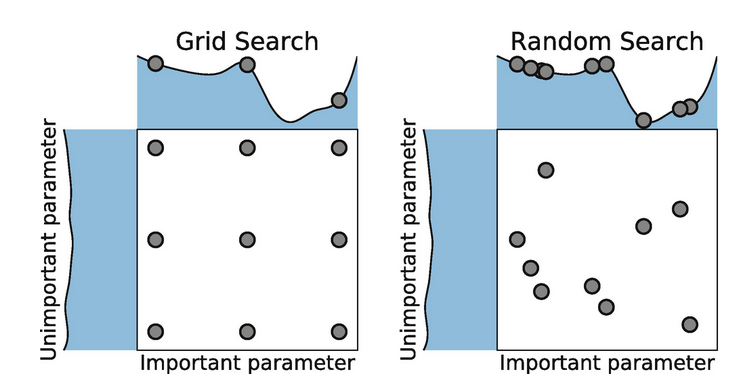

The Random Grid Search method allows you to decrease computational casos and, in some cases like the one in the previous image, can also produce better results.

Implementing the Random Grid Search method using scikit-learn is very easy, as it is available from the *RandomizedSearchCV* function.

In [9]:
from sklearn.model_selection import RandomizedSearchCV
?RandomizedSearchCV

The parametro *n_iter* tells the function how many values, randomly selected within the defined limits, we want to try.

In [10]:
grid_results_cv = RandomizedSearchCV(model_constructor(), 
                                     params_grid,                                      
                                     cv = 5, 
                                     n_jobs = 2,
                                     n_iter = 5, 
                                     random_state = 0)
grid_results_cv.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=5, n_jobs=2,
                   param_distributions={'C': [0.001, 1, 1000.0],
                                        'gamma': [0.001, 1, 1000.0]},
                   random_state=0)

In [11]:
print('Values validated for C hyperparameter: ' + str(grid_results_cv.cv_results_['param_C']))
print('Values validated for gamma hyperparameter: ' + str(grid_results_cv.cv_results_['param_gamma']))
print('Validation accuracy: ' + str(grid_results_cv.cv_results_['mean_test_score']))
print('Best score ' + str(grid_results_cv.best_score_))
print('Best params: ' + str(grid_results_cv.best_params_))

Values validated for C hyperparameter: [1000.0 0.001 0.001 1 1000.0]
Values validated for gamma hyperparameter: [1 1000.0 1 1 1000.0]
Validation accuracy: [0.94430769 0.36246154 0.36246154 0.96030769 0.36246154]
Best score 0.9603076923076923
Best params: {'gamma': 1, 'C': 1}
